In [3]:
# MARGIN GENERATION
import numpy as np
import pandas as pd
import datetime

# ARGUMENTS
n_products = 90000
n_days = 200
loc = 0.15
scale = 0.05

products = list(range(90000))
dates = [pd.to_datetime("2015-09-30").date() + datetime.timedelta(d) for d in range(n_days)]

scale_diff = scale/np.sqrt(n_days)
product_baseline = np.random.normal(loc=loc,scale=scale,size=(n_products,1))
product_diff = np.random.normal(loc=0, scale=scale_diff, size=(n_products, n_days-1))
margins = np.cumsum(np.concatenate([product_baseline, product_diff], axis=1), axis=1)
margins = pd.DataFrame(margins, columns=dates)
margins["product_id"] = products
del product_baseline, product_diff

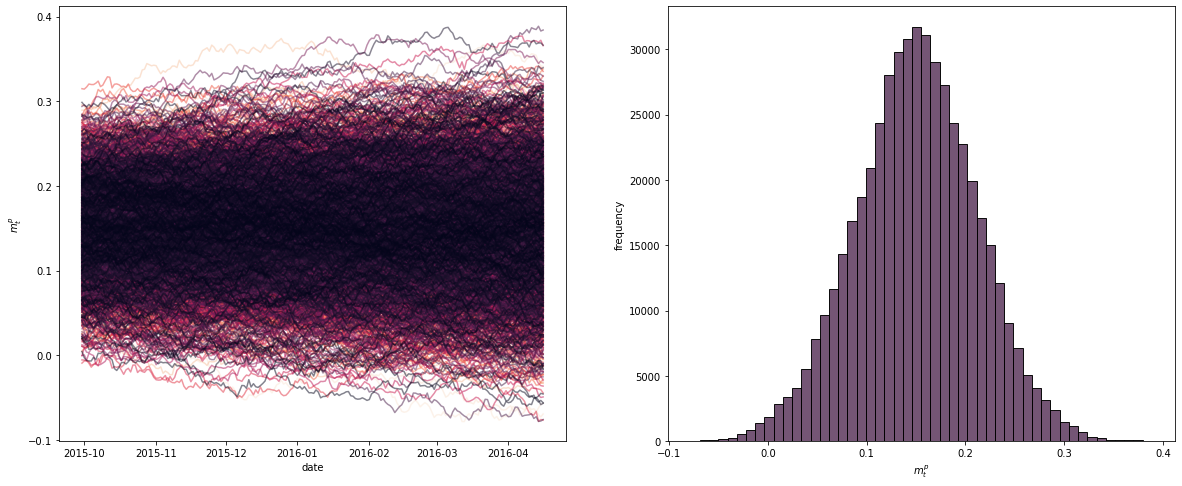

In [4]:
def plot_simulated_margin(margins):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    fig, axs = plt.subplots(1,2, figsize=(20,8))

    temp_margins = pd.melt(margins, id_vars=["product_id"],
        var_name="date", value_name="margin")

    # walk
    sns.lineplot(data=temp_margins,
        x="date", y="margin", hue="product_id",
        legend=False, palette=sns.color_palette("rocket_r", as_cmap=True),
        alpha=0.5, ax=axs[0]);
    axs[0].set_ylabel("$m_{t}^{p}$");    
    axs[0].set_xlabel("date");

    # hist
    sns.histplot(data=temp_margins,
        x="margin", bins=50,
        color=sns.color_palette("rocket",10)[1],
        ax=axs[1]);
    axs[1].set_ylabel("frequency");
    axs[1].set_xlabel("$m_{t}^{p}$");

plot_simulated_margin(margins[:2500])

In [ ]:
# propose solution for the profit evaluation

# plot observed-simulated profit in similar manner
# test on retailrocket